<a href="https://colab.research.google.com/github/SushilKokare/DeepLearningStudy/blob/main/2_MultiClassClassification_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

In [3]:
(xtr,ytr),(xts,yts) =  reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
xtr.shape, ytr.shape, xts.shape, yts.shape

((8982,), (8982,), (2246,), (2246,))

In [5]:
8981+2246

11227

In [6]:
print(xtr[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [8]:
reverse_word_index = dict( [(value,key) for (key,value) in word_index.items()] )

In [9]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in xtr[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
ytr[0]

3

### Embedding the data

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [13]:
xtr = vectorize_sequences(xtr)
xts = vectorize_sequences(xts)

In [15]:
xtr.shape, xts.shape

((8982, 10000), (2246, 10000))

In [16]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1
  return results

In [17]:
one_hot_ytr = to_one_hot(ytr)
one_hot_yts = to_one_hot(yts)

In [18]:
one_hot_ytr.shape, one_hot_yts.shape

((8982, 46), (2246, 46))

### Using inbuilt to_categorical function

In [21]:
from keras.utils import to_categorical

In [22]:
one_hot_ytr = to_categorical(ytr)
one_hot_yts = to_categorical(yts)

In [23]:
one_hot_ytr.shape, one_hot_yts.shape

((8982, 46), (2246, 46))

### Building Network

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
x_val = xtr[:1000]
partial_x_train = xtr[1000:]

y_val = one_hot_ytr[:1000]
partial_y_train = one_hot_ytr[1000:]

In [30]:
history = model.fit(partial_x_train,partial_y_train,
         epochs=20,batch_size=512,
         validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 152ms/step - loss: 2.8037 - accuracy: 0.5015 - val_loss: 1.8870 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 1s 58ms/step - loss: 1.5867 - accuracy: 0.6730 - val_loss: 1.4135 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 1s 61ms/step - loss: 1.2191 - accuracy: 0.7378 - val_loss: 1.2391 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.9951 - accuracy: 0.7880 - val_loss: 1.1014 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.8269 - accuracy: 0.8277 - val_loss: 1.0230 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 58ms/step - loss: 0.6917 - accuracy: 0.8530 - val_loss: 0.9725 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.5773 - accuracy: 0.8773 - val_loss: 0.9460 - val_accuracy: 0.7980
Epoch 8/20
1

In [46]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.803713,0.501503,1.887047,0.605
1,1.586698,0.673014,1.413487,0.689
2,1.219141,0.737785,1.239095,0.737
3,0.995064,0.788023,1.101416,0.769
4,0.826941,0.827737,1.022962,0.790
5,0.691690,0.853044,0.972521,0.800
6,0.577344,0.877349,0.946037,0.798
7,0.484567,0.896016,0.900282,0.813
8,0.410551,0.913806,0.888072,0.816
9,0.344929,0.925833,0.972902,0.795


###  PLotting Plots

In [31]:
import matplotlib.pyplot as plt

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

In [40]:
epochs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

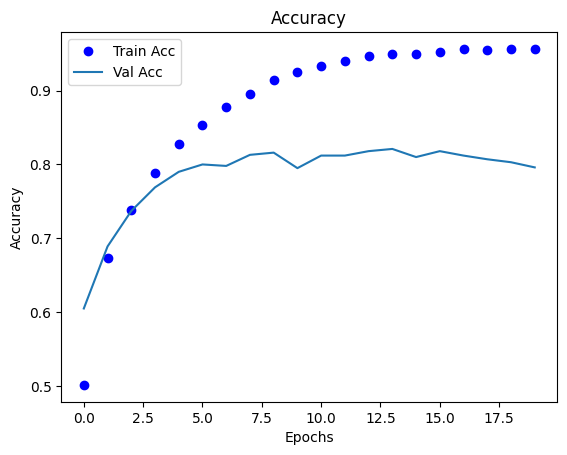

In [42]:
plt.plot(epochs,acc,'bo',label='Train Acc')
plt.plot(epochs,val_acc,label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

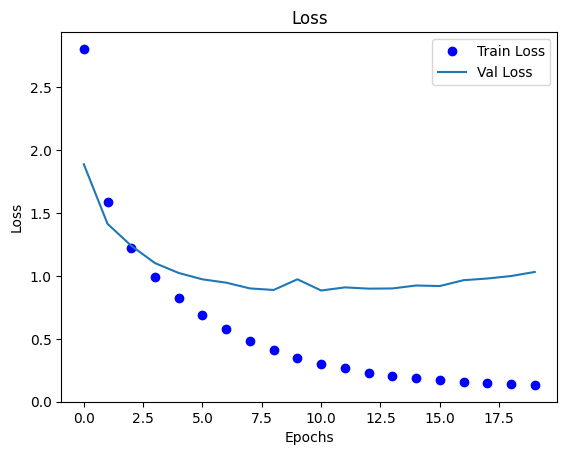

In [47]:
plt.plot(epochs,loss,'bo',label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [61]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



history2 = model.fit(partial_x_train,partial_y_train,
         epochs=8,batch_size=512,
         validation_data=(x_val,y_val))

Epoch 1/8
16/16 [==============================] - 2s 88ms/step - loss: 2.7424 - accuracy: 0.4699 - val_loss: 1.8532 - val_accuracy: 0.5940
Epoch 2/8
16/16 [==============================] - 1s 58ms/step - loss: 1.5920 - accuracy: 0.6606 - val_loss: 1.4231 - val_accuracy: 0.6800
Epoch 3/8
16/16 [==============================] - 1s 58ms/step - loss: 1.2284 - accuracy: 0.7324 - val_loss: 1.2125 - val_accuracy: 0.7210
Epoch 4/8
16/16 [==============================] - 1s 57ms/step - loss: 1.0068 - accuracy: 0.7794 - val_loss: 1.0945 - val_accuracy: 0.7640
Epoch 5/8
16/16 [==============================] - 1s 56ms/step - loss: 0.8384 - accuracy: 0.8206 - val_loss: 1.0273 - val_accuracy: 0.7670
Epoch 6/8
16/16 [==============================] - 1s 57ms/step - loss: 0.7007 - accuracy: 0.8488 - val_loss: 0.9678 - val_accuracy: 0.7860
Epoch 7/8
16/16 [==============================] - 1s 54ms/step - loss: 0.5850 - accuracy: 0.8768 - val_loss: 0.9352 - val_accuracy: 0.7960
Epoch 8/8
16/16 [===

In [62]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = history2.epoch

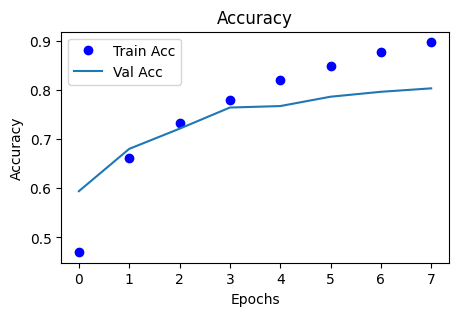

In [64]:
plt.figure(figsize=(5,3))

plt.plot(epochs,acc,'bo',label='Train Acc')
plt.plot(epochs,val_acc,label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

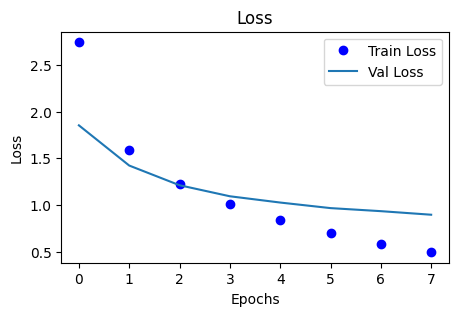

In [65]:
plt.figure(figsize=(5,3))
plt.plot(epochs,loss,'bo',label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [67]:
results = model.evaluate(xts,one_hot_yts)

71/71 [==============================] - 0s 5ms/step - loss: 0.9791 - accuracy: 0.7716


In [70]:
print('Test Accuracy = ',results[1]*100)
print('Test Loss = ',results[0])

Test Accuracy =  77.15939283370972
Test Loss =  0.9790645837783813


In [71]:
import copy

In [73]:
test_labels_copy = copy.copy(yts)

In [74]:
np.random.shuffle(test_labels_copy)

In [75]:
hits_array = np.array(yts) == np.array(test_labels_copy)

In [76]:
float(np.sum(hits_array))/len(yts)

0.19946571682991987

### Generating prediction for new data

In [77]:
predictions = model.predict(xts)

71/71 [==============================] - 1s 8ms/step


In [78]:
predictions.shape

(2246, 46)

In [79]:
predictions[0].shape

(46,)

In [80]:
np.sum(predictions[0])

0.99999994

In [81]:
yts[0]

3

In [82]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [83]:
y_train = np.array(ytr)
y_test = np.array(yts)

In [85]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [86]:
result3 = model.fit(xtr,y_train,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
57/57 [==============================] - 2s 32ms/step - loss: 0.4929 - acc: 0.8946 - val_loss: 0.4704 - val_acc: 0.8792
Epoch 2/20
57/57 [==============================] - 2s 27ms/step - loss: 0.3446 - acc: 0.9269 - val_loss: 0.4371 - val_acc: 0.8998
Epoch 3/20
57/57 [==============================] - 2s 34ms/step - loss: 0.2651 - acc: 0.9404 - val_loss: 0.4719 - val_acc: 0.8898
Epoch 4/20
57/57 [==============================] - 2s 31ms/step - loss: 0.2075 - acc: 0.9530 - val_loss: 0.5003 - val_acc: 0.8804
Epoch 5/20
57/57 [==============================] - 1s 21ms/step - loss: 0.1816 - acc: 0.9570 - val_loss: 0.4789 - val_acc: 0.8848
Epoch 6/20
57/57 [==============================] - 1s 21ms/step - loss: 0.1625 - acc: 0.9580 - val_loss: 0.5283 - val_acc: 0.8687
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 0.1496 - acc: 0.9584 - val_loss: 0.5276 - val_acc: 0.8776
Epoch 8/20
57/57 [==============================] - 2s 29ms/step - loss: 0.1363 - a

In [88]:
acc = result3.history['acc']
val_acc = result3.history['val_acc']

loss = result3.history['loss']
val_loss = result3.history['val_loss']

epochs = result3.epoch

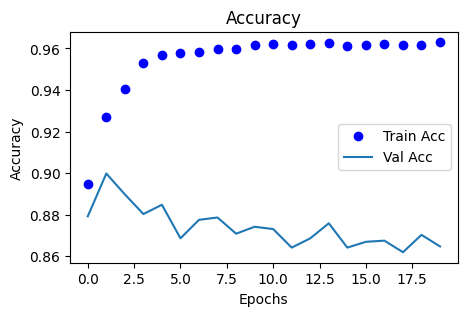

In [89]:
plt.figure(figsize=(5,3))

plt.plot(epochs,acc,'bo',label='Train Acc')
plt.plot(epochs,val_acc,label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

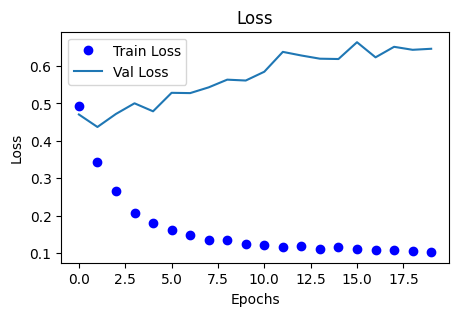

In [90]:
plt.figure(figsize=(5,3))
plt.plot(epochs,loss,'bo',label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()